In [1]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from eda_analyzer import *

In [2]:
import pandas as pd

# Load the data
test = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv', low_memory=False)

In [3]:
# Check for missing values
print(train.isnull().sum())
print(test.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


In [4]:
test['Open'].fillna(test['Open'].mode()[0], inplace=True)

In [5]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [6]:
test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

Training set Promo distribution:
 Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64
Test set Promo distribution:
 Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


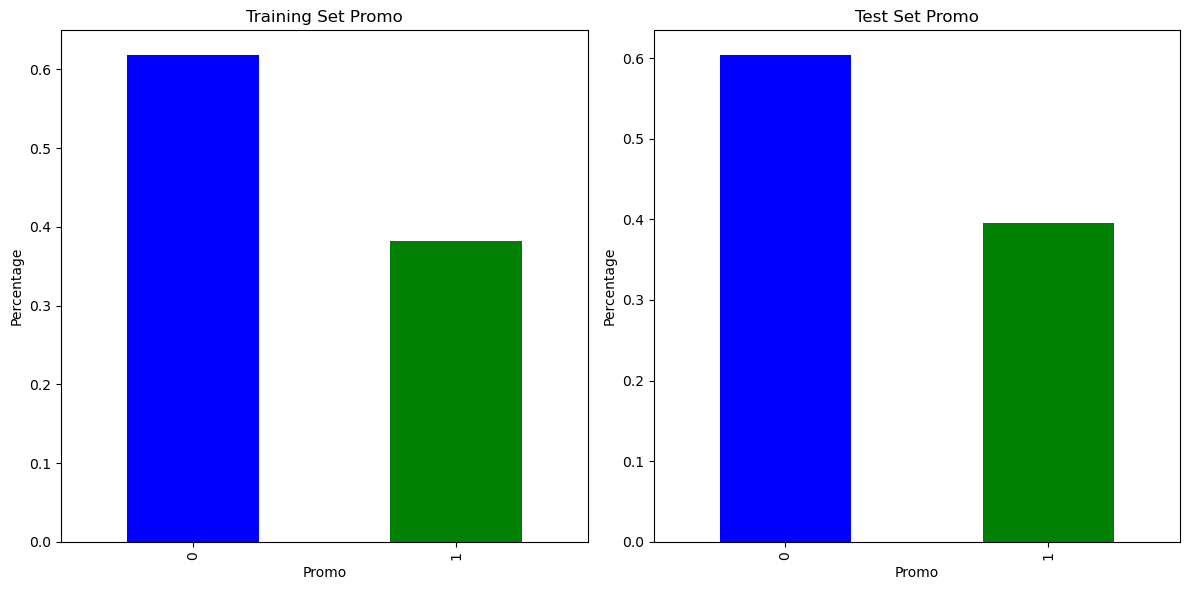

In [7]:
# Example of using the function
compare_promo_distribution(train, test)

Upon comparing the distribution of the Promo feature in both the training and test sets, the following insights were observed:

- In the training set, approximately 61.85% of the days had no promotions (Promo = 0), and 38.15% had promotions running (Promo = 1).
- In the test set, about 60.42% of the days had no promotions, while 39.58% had active promotions.

This shows that the distribution of promotions between the training and test datasets is fairly similar, with a slight difference:

The proportion of days without a promotion is marginally higher in the training set (61.85%) compared to the test set (60.42%).
Conversely, the proportion of days with a promotion is slightly higher in the test set (39.58%) compared to the training set (38.15%).
# Implications:

The small difference in Promo distribution between the training and test sets suggests that the promotion patterns are relatively consistent across both datasets. This implies that any model trained to predict outcomes based on promotions in the training set is likely to generalize well on the test set, as the exposure to promotions is balanced and similar across both sets.

           Period        Sales
0   After Holiday  7520.921690
1  Before Holiday  5590.082289
2  During Holiday   266.133931
3     Regular Day  5897.463309


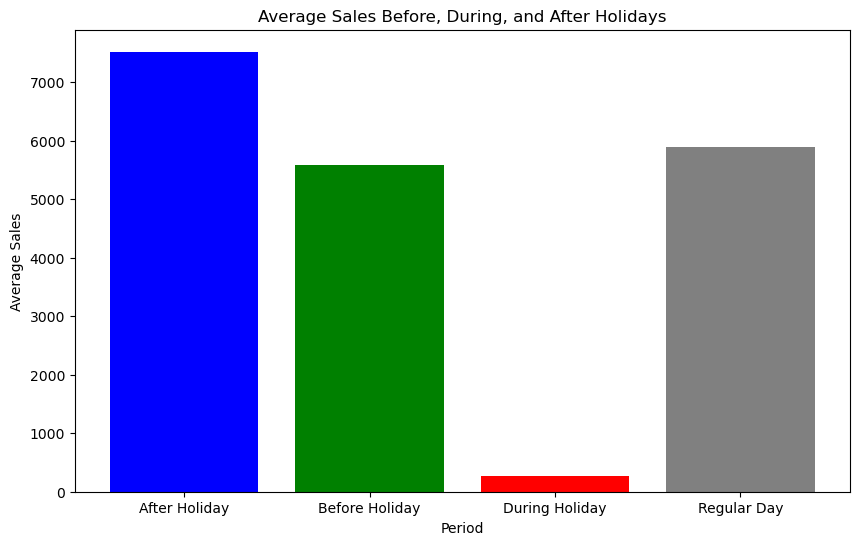

In [8]:
analyze_sales_around_holidays(train)

The detailed interpretation of the average sales behavior before, during, and after holidays:

### Findings Summary:

| **Period**         | **Average Sales** |
|--------------------|-------------------|
| **After Holiday**  | **7520.92**       |
| **Before Holiday** | **5590.08**       |
| **During Holiday** | **266.13**        |
| **Regular Day**    | **5897.46**       |

### Interpretation of Results:

1. **After Holiday (7520.92)**:
   - The highest average sales occur **after the holiday**, indicating a potential post-holiday shopping surge. This may be attributed to consumers taking advantage of post-holiday sales, returning to stores, or spending gift money received during holidays.

2. **Before Holiday (5590.08)**:
   - Sales are also significantly high **before the holiday**. This reflects consumer behavior as they prepare for the holiday, potentially buying gifts, food, and other holiday-related items. The anticipation and excitement leading up to the holiday drive higher sales.

3. **During Holiday (266.13)**:
   - There is a sharp decline in average sales **during the holiday**. This could be due to several factors, including store closures on public holidays or a shift in shopping behavior where customers prefer to celebrate at home rather than shopping.

4. **Regular Day (5897.46)**:
   - Average sales on regular days are quite stable and fall between the sales before and after holidays. This suggests that, outside of holiday periods, sales maintain a consistent level.


       Holiday        Sales
0    Christmas  5374.652927
1       Easter  6115.797608
2  Regular Day  5782.588690


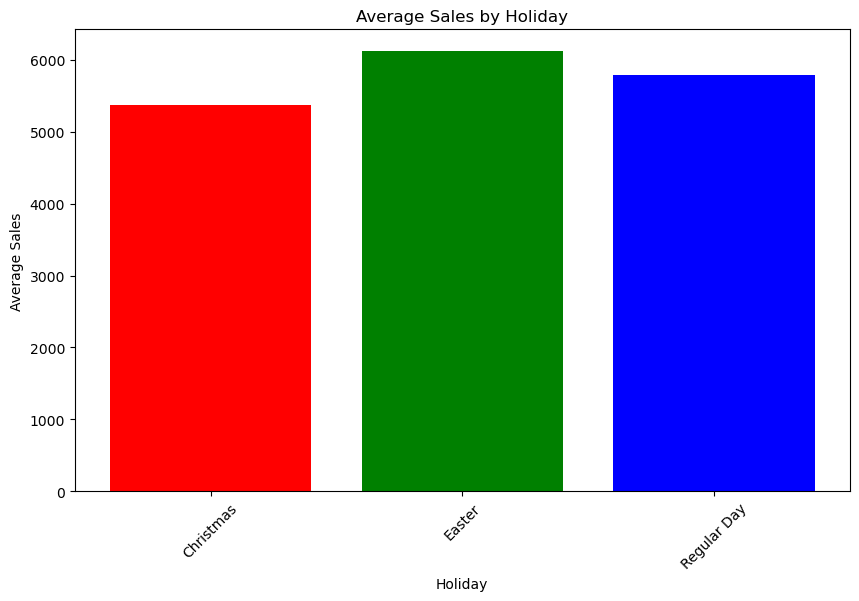

In [9]:
train['Holiday'] = train['Date'].apply(classify_holiday)

# Group by holiday and calculate average sales
holiday_sales = train.groupby('Holiday')['Sales'].mean().reset_index()


# Display numerical values
print(holiday_sales)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(holiday_sales['Holiday'], holiday_sales['Sales'], color=['red', 'green', 'blue'])
plt.title('Average Sales by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

Based on the analysis of average sales during different holiday periods, we observe the following findings:

| Holiday        | Average Sales  |
|----------------|----------------|
| **Christmas**  | **$5,374.65**  |
| **Easter**     | **$6,115.80**  |
| **Regular Day**| **$5,782.59**  |

### Key Observations

1. **Easter Sales**:
   - The average sales during Easter are the highest at **$6,115.80**. This suggests that customers tend to spend more during this holiday period, possibly due to seasonal promotions or increased consumer activity around Easter festivities.

2. **Regular Day Sales**:
   - The average sales on regular days stand at **$5,782.59**, which serves as a baseline for comparison. This figure is relatively close to the Easter sales, indicating that consumer spending remains strong even outside of holiday periods.

3. **Christmas Sales**:
   - The average sales during the Christmas period are **$5,374.65**, which is lower than both Easter and regular days. This is somewhat surprising, as Christmas is typically associated with higher consumer spending. This could indicate that either promotional strategies or inventory availability during this holiday may not have met customer expectations.


In [10]:
correlation = train['Sales'].corr(train['Customers'])
print(f"Correlation between Sales and Number of Customers: {correlation:.4f}")

Correlation between Sales and Number of Customers: 0.8947


### Interpretation of Correlation Between Sales and Number of Customers

With a correlation coefficient of **0.8947**, we can draw several conclusions about the relationship between sales and the number of customers:

1. **Strong Positive Correlation**:
   - The correlation of **0.8947** indicates a strong positive relationship between sales and the number of customers. This means that, in general, as the number of customers increases, sales also tend to increase significantly.

2. **Implications for Business Strategy**:
   - Given this strong correlation, it is crucial for the business to focus on strategies that increase customer footfall. This could include:
     - **Targeted Marketing Campaigns**: Implementing promotions or advertisements that attract more customers.
     - **Seasonal Promotions**: Capitalizing on holidays or special events to draw in larger crowds.
     - **Enhancing Customer Experience**: Improving in-store experiences can encourage repeat visits and word-of-mouth referrals.

### Conclusion
In summary, the correlation coefficient of **0.8947** highlights the importance of customer volume in driving sales. Businesses should prioritize customer engagement and retention strategies to maximize sales growth and capitalize on this strong correlation. Regularly monitoring and analyzing this relationship can help adjust tactics in real-time to optimize performance.


In [11]:
# Calculate average sales during promotions and non-promotions
promo_sales = train.groupby('Promo')['Sales'].mean().reset_index()
print(promo_sales)


   Promo        Sales
0      0  4406.050805
1      1  7991.152046


In [12]:
# Calculate average customers during promotions and non-promotions
promo_customers = train.groupby('Promo')['Customers'].mean().reset_index()
print(promo_customers)

   Promo   Customers
0      0  517.823542
1      1  820.098815


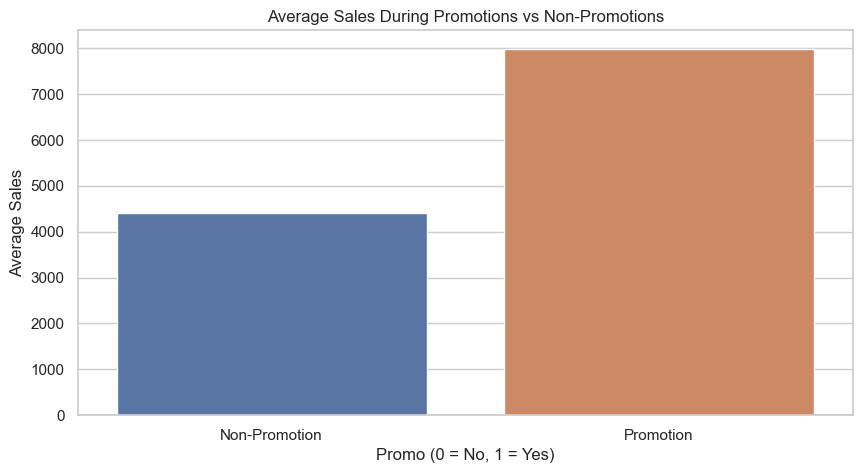

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot average sales
plt.figure(figsize=(10, 5))
sns.barplot(x='Promo', y='Sales', data=promo_sales)
plt.title('Average Sales During Promotions vs Non-Promotions')
plt.xlabel('Promo (0 = No, 1 = Yes)')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['Non-Promotion', 'Promotion'])
plt.show()


### Summary of Average Sales During Promotions

| Promo | Average Sales |
|-------|---------------|
| 0     | 4,406.05      |
| 1     | 7,991.15      |

- **Promo = 0** (Non-Promotion): The average sales amount to **4,406.05**.
- **Promo = 1** (Promotion): The average sales significantly increase to **7,991.15**.

### Conclusion
The data indicates that promotions have a substantial positive impact on sales. On average, stores experience nearly **3,585.10** more in sales when running promotions compared to non-promotional periods. This suggests that promotional activities are effective in boosting sales and should be leveraged strategically to maximize revenue.


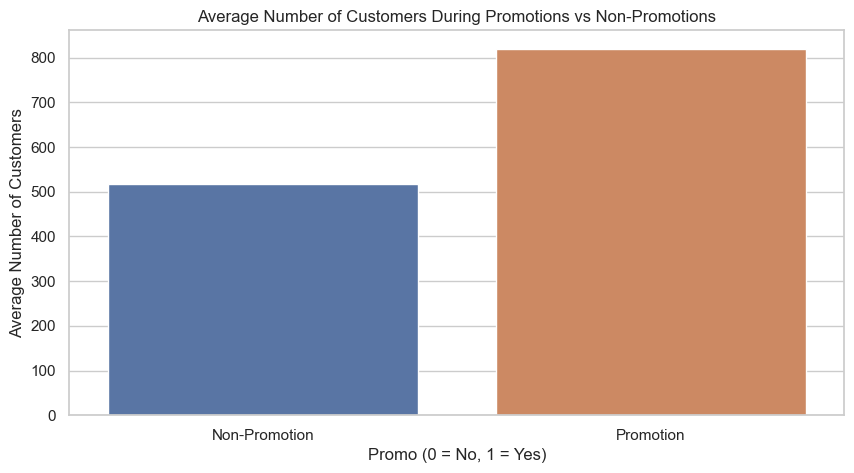

In [14]:
# Plot average customers
plt.figure(figsize=(10, 5))
sns.barplot(x='Promo', y='Customers', data=promo_customers)
plt.title('Average Number of Customers During Promotions vs Non-Promotions')
plt.xlabel('Promo (0 = No, 1 = Yes)')
plt.ylabel('Average Number of Customers')
plt.xticks([0, 1], ['Non-Promotion', 'Promotion'])
plt.show()

### Summary of Average Customers During Promotions

| Promo | Average Customers |
|-------|-------------------|
| 0     | 517.82            |
| 1     | 820.10            |

*   **Promo = 0** (Non-Promotion): The average number of customers is **517.82**.
*   **Promo = 1** (Promotion): The average number of customers increases to **820.10**.

### Conclusion

The analysis indicates that promotional activities significantly attract more customers. Specifically, stores see an increase of approximately **302.28** customers on average during promotional periods compared to non-promotional days. This finding suggests that promotions not only boost sales but also enhance customer footfall, making them a valuable strategy for driving business growth.


In [15]:
store = pd.read_csv('../data/store.csv', low_memory=False)
# Merge datasets
merged_data = merge_data(train, store)

# Perform analyses
promo_analysis = analyze_promo_effectiveness(merged_data)
underperforming_stores = identify_underperforming_stores(merged_data)
sales_lift = calculate_sales_lift(merged_data)
store_type_performance = analyze_store_type_performance(merged_data)
competition_analysis = analyze_competition_distance(merged_data)

# Display the results
print("Promotional Analysis:")
print(promo_analysis)

print("\nUnderperforming Stores:")
print(underperforming_stores)

print("\nSales Lift by Store:")
print(sales_lift)

print("\nStore Type Performance:")
print(store_type_performance)

print("\nCompetition Analysis:")
print(competition_analysis)

Promotional Analysis:
   Promo  Average_Sales  Average_Customers
0      0    4406.050805         517.823542
1      1    7991.152046         820.098815

Underperforming Stores:
      Store  Total_Sales  Average_Customers  Promo_Usage
0         1      3716854         467.646497     0.382166
1         2      3883858         486.045648     0.382166
4         5      3642818         444.360934     0.382166
12       13      3126578         313.641161     0.377309
21       22      2801506         411.779683     0.377309
...     ...          ...                ...          ...
1104   1105      3555802         421.781316     0.382166
1105   1106      3836971         464.085987     0.382166
1106   1107      3882362         549.465699     0.377309
1108   1109      3064721         371.179420     0.377309
1109   1110      3548486         449.000000     0.382166

[279 rows x 4 columns]

Sales Lift by Store:
      Store  Sales_Before_Promo  Sales_During_Promo   Sales_Lift
0         1         3198.9948

### Could the Promos Be Deployed in More Effective Ways?

Yes, the analysis indicates that promotions could be deployed more effectively. Here are some strategies to consider:

1. **Target Underperforming Stores**: 
   - Focus promotional efforts on the **279 underperforming stores** identified in the analysis. These stores show lower sales and customer counts, suggesting they could benefit significantly from enhanced promotional activities. 

2. **Tailored Promotions**:
   - Customize promotions based on the performance metrics of individual stores. For example, stores that have demonstrated a significant sales lift during past promotions should receive more targeted and possibly higher-value promotions.

3. **Optimize Timing and Frequency**:
   - Analyze historical data to identify the best times for promotions (e.g., holidays, weekends, or specific sales periods) to maximize their effectiveness. Increasing the frequency of promotions during these peak times could lead to better sales performance.

4. **Leverage Successful Store Types**:
   - Use the insights from the **Store Type Performance** analysis to inform promotional strategies. For example, stores of type **b** with assortment **c**, which have the highest average sales, could be used as models for promotional strategies that could be applied to other store types.

### Which Stores Should Promos Be Deployed In?

Promotions should be strategically deployed in the following types of stores:

1. **Underperforming Stores**:
   - As mentioned earlier, focus on the **279 underperforming stores** that show low total sales and average customers. This includes stores with a **Promo Usage** rate below average, indicating they may not be fully capitalizing on promotional opportunities.

2. **Stores with High Sales Lift Potential**:
   - Analyze the **Sales Lift by Store** data to identify stores that have shown significant increases in sales during previous promotions. Target these stores for future promotions to capitalize on their potential.

3. **Competitive Locations**:
   - Stores located near strong competitors should also be prioritized for promotions. These promotions could help attract customers who might otherwise shop at competitor locations.

4. **Store Types with Proven Success**:
   - Promote stores of type **b** with assortment **c**, which have shown the highest average sales, as they may benefit from additional promotional efforts and are likely to yield higher returns on investment.

By focusing promotional efforts on these specific stores and optimizing the promotion strategies, you can enhance sales performance and customer engagement effectively.

In [16]:
# behavior trend
# Group by DayOfWeek to analyze customer behavior
weekly_behavior_analysis = train.groupby('DayOfWeek').agg(
    Average_Customers=('Customers', 'mean'),
    Total_Customers=('Customers', 'sum'),
    Average_Sales=('Sales', 'mean'),
    Total_Sales=('Sales', 'sum')
).reset_index()

# Display the analysis
print(weekly_behavior_analysis)

   DayOfWeek  Average_Customers  Total_Customers  Average_Sales  Total_Sales
0          1         813.065791        117675012    7809.044510   1130203012
1          2         760.984615        110848063    7005.244467   1020411930
2          3         721.639666        105117642    6555.884138    954962863
3          4         697.541486        101732938    6247.575913    911177709
4          5         743.150742        108384820    6723.274305    980555941
5          6         657.112237         95103854    5847.562599    846317735
6          7          35.786817          5179426     204.183189     29551433


### Customer Behavior Analysis by Day of the Week

| Day of Week | Average Customers | Total Customers | Average Sales | Total Sales     |
|-------------|-------------------|-----------------|----------------|------------------|
| 1 (Monday)  | 813.07            | 117,675,012     | 7,809.04       | 1,130,203,012    |
| 2 (Tuesday) | 760.98            | 110,848,063     | 7,005.24       | 1,020,411,930    |
| 3 (Wednesday)| 721.64           | 105,117,642     | 6,555.88       | 954,962,863      |
| 4 (Thursday)| 697.54            | 101,732,938     | 6,247.58       | 911,177,709      |
| 5 (Friday)  | 743.15            | 108,384,820     | 6,723.27       | 980,555,941      |
| 6 (Saturday)| 657.11            | 95,103,854      | 5,847.56       | 846,317,735      |
| 7 (Sunday)  | 35.79             | 5,179,426       | 204.18         | 29,551,433       |

### Summary

* **Peak Day**: Monday (Day 1) shows the highest average customers and sales.
* **Lowest Day**: Sunday (Day 7) has significantly fewer customers and lower sales.
* **Trend**: Customer visits and sales tend to decrease as the week progresses, with a notable drop on Sundays.


In [17]:
# Group by Date to analyze customer behavior
daily_behavior_analysis = train.groupby('Date').agg(
    Average_Customers=('Customers', 'mean'),
    Total_Customers=('Customers', 'sum'),
    Average_Sales=('Sales', 'mean'),
    Total_Sales=('Sales', 'sum')
).reset_index()

# Display the analysis
print(daily_behavior_analysis)


          Date  Average_Customers  Total_Customers  Average_Sales  Total_Sales
0   2013-01-01          17.496409            19491      87.284560        97235
1   2013-01-02         748.049327           834075    6233.030493      6949829
2   2013-01-03         682.547085           761040    5693.112108      6347820
3   2013-01-04         701.468161           782137    5954.218834      6638954
4   2013-01-05         616.566816           687472    5337.751570      5951593
..         ...                ...              ...            ...          ...
937 2015-07-27         870.369507           970462    9602.952466     10707292
938 2015-07-28         785.732735           876092    8174.953363      9115073
939 2015-07-29         743.070852           828524    7623.284305      8499962
940 2015-07-30         769.997309           858547    7891.348879      8798854
941 2015-07-31         868.717489           968620    9067.033184     10109742

[942 rows x 5 columns]


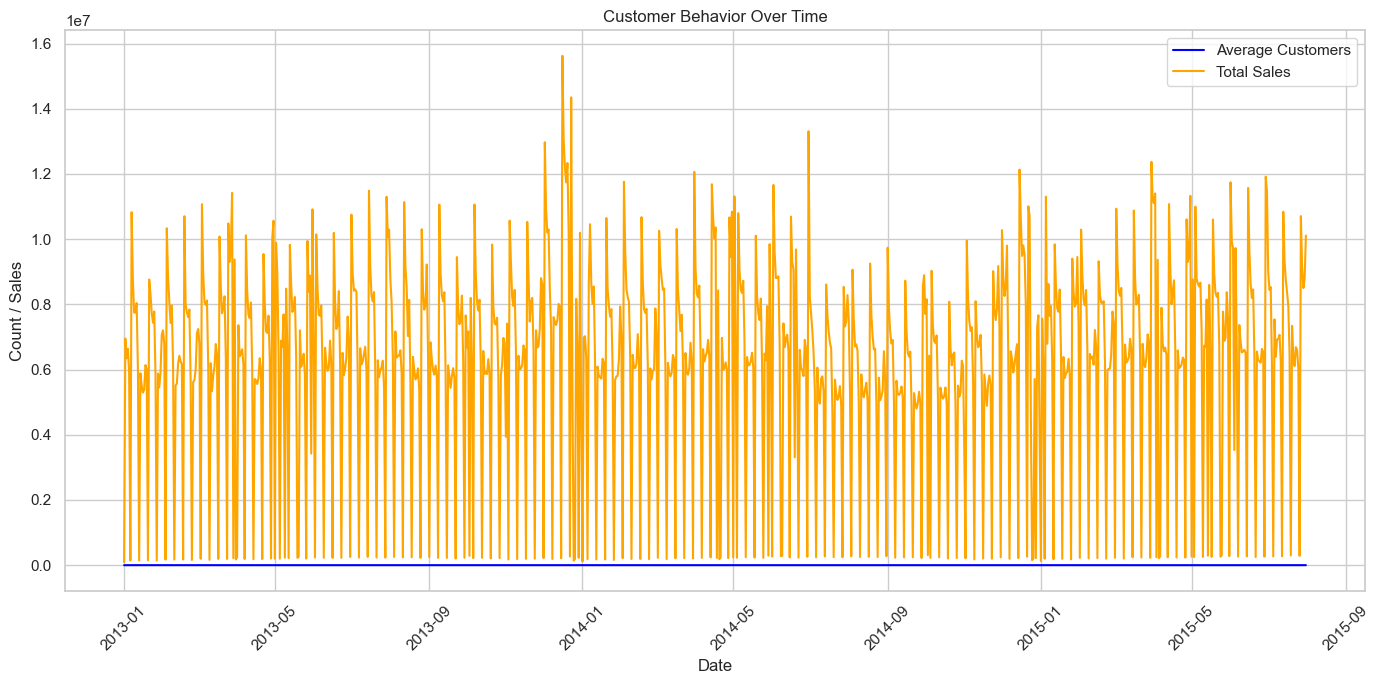

In [18]:
# Visualization
plt.figure(figsize=(14, 7))
plt.plot(daily_behavior_analysis['Date'], daily_behavior_analysis['Average_Customers'], label='Average Customers', color='blue')
plt.plot(daily_behavior_analysis['Date'], daily_behavior_analysis['Total_Sales'], label='Total Sales', color='orange')
plt.title('Customer Behavior Over Time')
plt.xlabel('Date')
plt.ylabel('Count / Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Key Findings:
Total Sales fluctuate significantly over time, with frequent high spikes indicating short-term surges in sales. This suggests possible seasonality or promotional events that drive sales up at certain intervals.
Average Customers remain relatively constant and very low compared to the scale of total sales. The blue line is almost flat, which could mean that despite the small changes in the number of customers, the sales revenue experiences high volatility.
Sales Peaks: The repeated spikes in sales without corresponding increases in customer count may imply that the average purchase size per customer rises dramatically during those periods.

In [19]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Holiday'],
      dtype='object')

In [20]:
store = pd.read_csv('../data/store.csv', low_memory=False)

In [21]:
 # Ensure 'Date' is in datetime format
train['Date'] = pd.to_datetime(train['Date'])
    
# Get stores open all weekdays
stores_open_weekdays = get_stores_open_all_weekdays(train)
   
# Compare weekend sales between stores open all weekdays and other stores
weekend_sales_comparison = compare_weekend_sales(train, stores_open_weekdays)
    
# Output results
print("Weekend Sales Comparison:")
print(weekend_sales_comparison)

Weekend Sales Comparison:
       Stores Open Weekdays  Other Stores
Store                                    
1                       NaN   4836.783270
2                       NaN   3754.269962
3                       NaN   5804.490421
4                       NaN   9798.041825
5                       NaN   3436.759542
...                     ...           ...
1111                    NaN   4328.800766
1112                    NaN   9302.275862
1113                    NaN   6233.498099
1114                    NaN  21426.783270
1115                    NaN   6638.148289

[1115 rows x 2 columns]


In [22]:
merged_df = pd.merge(train, store[['Store', 'Assortment']], on='Store', how='left')

In [23]:
 # Calculate average sales by assortment type
sales_by_assortment = calculate_sales_by_assortment(merged_df)
    
# Output the results
print("Average Sales by Assortment Type:")
print(sales_by_assortment)

Average Sales by Assortment Type:
  Assortment  Average Sales
0          a    6621.017039
1          b    8639.346322
2          c    7300.526339


### Summary: Impact of Assortment Type on Sales

The analysis of sales data across different assortment types reveals notable differences in average sales:

- **Assortment A (Basic)**: Average Sales = **6,621**
- **Assortment B (Extra)**: Average Sales = **8,639**
- **Assortment C (Extended)**: Average Sales = **7,300**

#### Key Insights:

- Stores with **Assortment B (Extra)** have the highest average sales, indicating that a broader selection of products tends to attract more revenue.
- **Assortment A (Basic)** has the lowest average sales, suggesting that limited product offerings may be less appealing to customers.
- **Assortment C (Extended)** performs better than Assortment A but is still behind Assortment B in terms of sales.


In [24]:
avg_sales_by_comp_distance = analyze_sales_by_competition_distance(train, store)
print("Average Sales by Competition Distance:")
print(avg_sales_by_comp_distance)

Average Sales by Competition Distance:
  CompetitionDistanceRange        Sales
0                    <500m  7581.487463
1                500-1000m  6642.811920
2               1000-5000m  6812.871309
3                   >5000m  6782.030387


c:\Users\HP\Documents\10-Academy\Rossmann-Pharmaceuticals-WEEK4\scripts\eda_analyzer.py:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_competition_distance['CompetitionDistanceRange'] = pd.cut(store_competition_distance['CompetitionDistance'], bins=bins, labels=labels)
c:\Users\HP\Documents\10-Academy\Rossmann-Pharmaceuticals-WEEK4\scripts\eda_analyzer.py:279: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_by_comp_distance = sales_with_competition_distance.groupby('CompetitionDistanceRange')['Sales'].mean().reset_index()


### Summary: Impact of Competition Distance on Sales

The analysis of average sales across different competition distance ranges provides insights into how proximity to competitors influences store performance. Here are the findings:

| Competition Distance Range | Average Sales |
| --- | --- |
| **<500m** | 7,581.49 |
| **500-1000m** | 6,642.81 |
| **1000-5000m** | 6,812.87 |
| **>5000m** | 6,782.03 |

#### Key Insights:

*   **Stores within 500 meters** of competitors have the highest average sales, suggesting that proximity may enhance customer access and visibility.
*   **Average sales decrease** as the distance increases to the next competitor, with stores in the **500-1000 meters** range seeing a significant drop in sales.
*   Sales stabilize around the **1000-5000 meters** range, indicating that being moderately distanced from competitors does not heavily affect sales.
*   Stores located **more than 5000 meters** away from competitors show only a slight decrease in sales compared to the 1000-5000 meters range.


In [25]:
# Assuming you have your train and store datasets loaded as train and store
competitor_effect_summary = analyze_competitor_opening_effect(train, store)
print(competitor_effect_summary)

Stores with NA in CompetitionDistance: [291, 622, 879]
Stores that later have valid CompetitionDistance: []
{}


The analysis revealed that three stores—Store 291, Store 622, and Store 879—have missing values in the CompetitionDistance column. Further examination confirmed that none of these stores later acquired a valid CompetitionDistance, indicating a consistent lack of data for this feature throughout the dataset. This absence could impact any analyses or predictive modeling efforts utilizing CompetitionDistance, as it limits the understanding of competitive dynamics for these specific locations.